
✅ 사용 독립변수: ['age', 'monthly_usage', 'contract_length', 'support_calls', 'payment_delay']
✅ 사용 종속변수: ['churn']

 결측치 상태:
age                0
monthly_usage      0
contract_length    0
support_calls      0
payment_delay      0
churn              0
dtype: int64
              age  monthly_usage  contract_length  support_calls  \
count  500.000000     500.000000       500.000000     500.000000   
mean    44.072000      20.068472        11.172000       1.574000   
std     15.541103       5.169526         7.702277       1.209732   
min     18.000000       3.414903         1.000000       0.000000   
25%     30.000000      16.603748         1.000000       1.000000   
50%     44.000000      20.382571        12.000000       1.000000   
75%     58.000000      23.389781        12.000000       2.000000   
max     69.000000      36.941055        24.000000       6.000000   

       payment_delay       churn  
count     500.000000  500.000000  
mean        0.206000    0.160000  
std         0.404836  

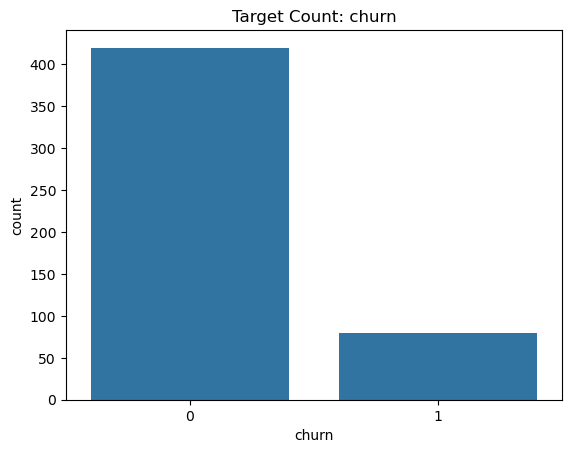

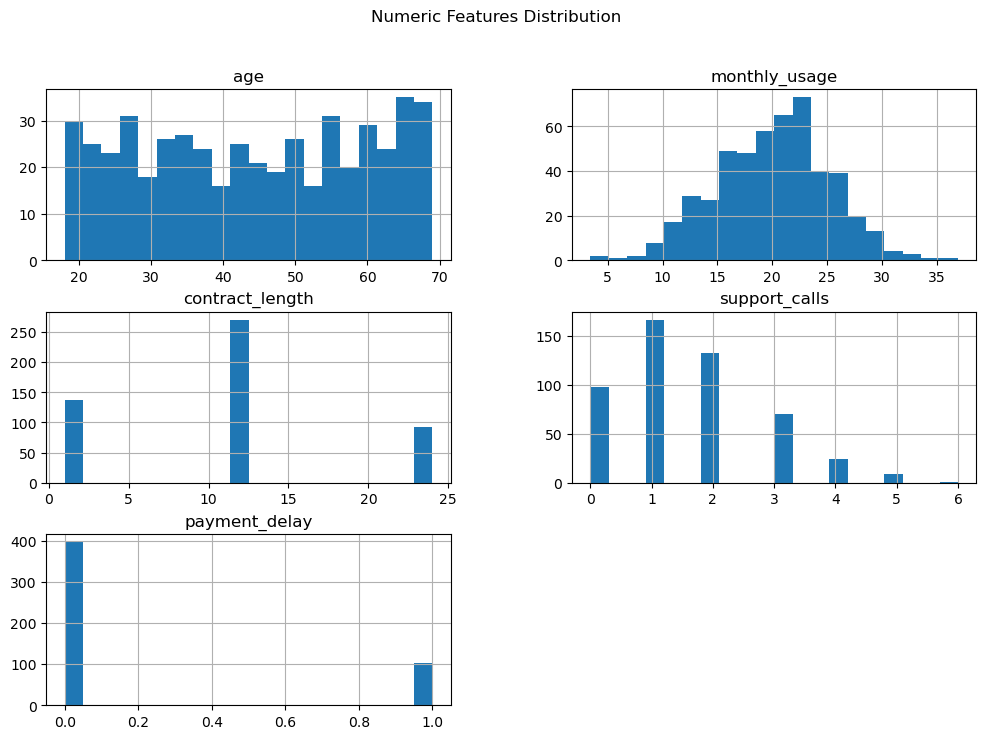

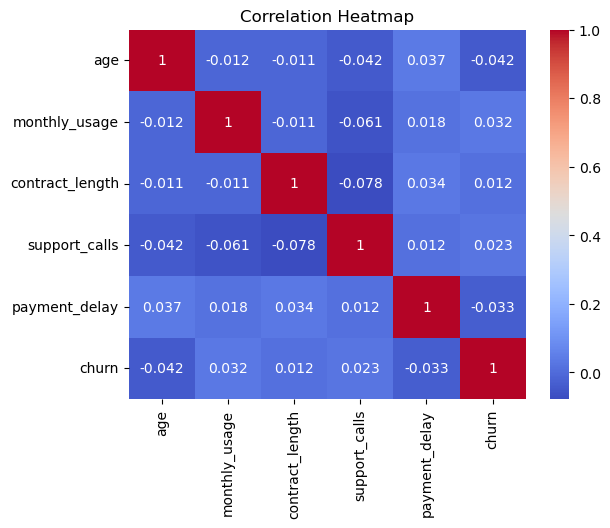


=== Bagging ===
K-Fold CV Accuracy: 0.8160 (scores : 0.0280) 
Accuracy: 0.8500 | Precision: 0.6667 | Recall: 0.1250
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        84
           1       0.67      0.12      0.21        16

    accuracy                           0.85       100
   macro avg       0.76      0.56      0.56       100
weighted avg       0.83      0.85      0.80       100



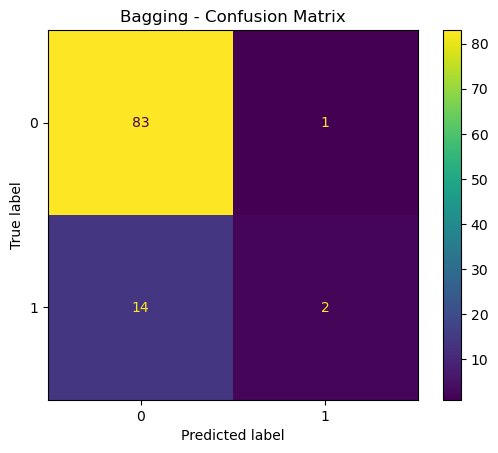

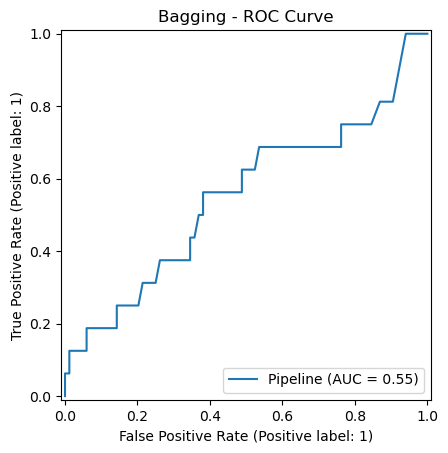

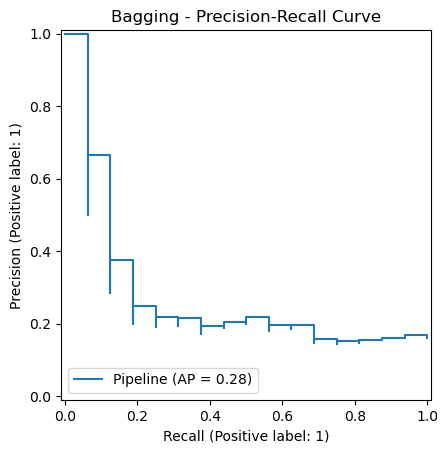


=== RandomForest ===
K-Fold CV Accuracy: 0.8320 (scores : 0.0172) 
Accuracy: 0.8500 | Precision: 1.0000 | Recall: 0.0625
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        84
           1       1.00      0.06      0.12        16

    accuracy                           0.85       100
   macro avg       0.92      0.53      0.52       100
weighted avg       0.87      0.85      0.79       100



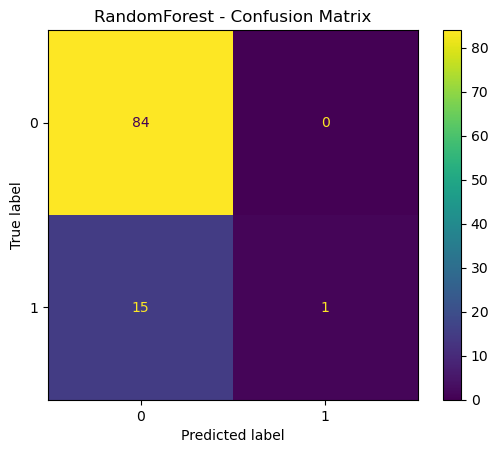

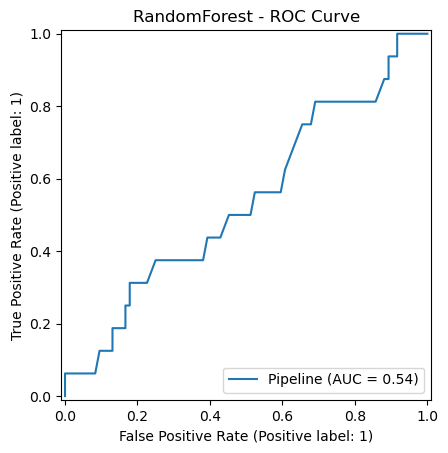

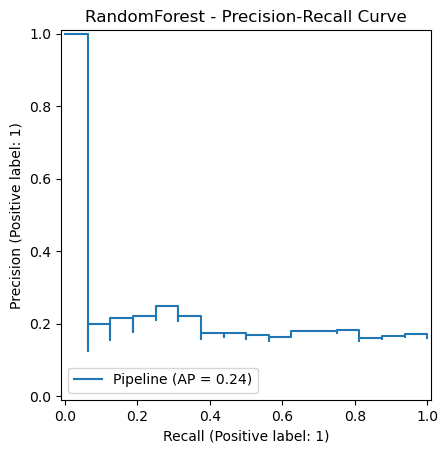


=== AdaBoost ===


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

K-Fold CV Accuracy: 0.8060 (scores : 0.0287) 


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8000 | Precision: 0.0000 | Recall: 0.0000
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        84
           1       0.00      0.00      0.00        16

    accuracy                           0.80       100
   macro avg       0.42      0.48      0.44       100
weighted avg       0.70      0.80      0.75       100



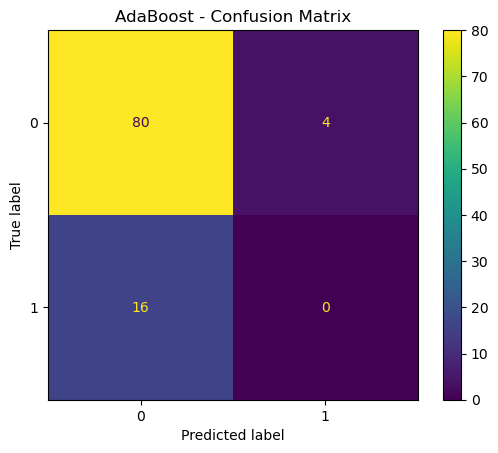

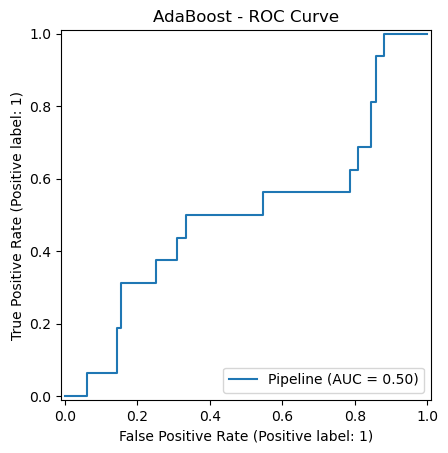

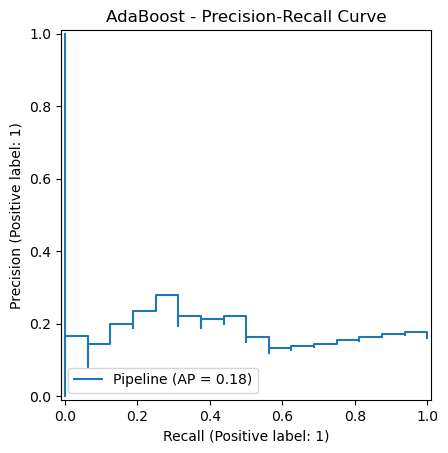


✅ 결과가 result.csv 로 저장


In [4]:
# 1) 라이브러리 & 데이터 로드
import pandas as pd

csv_file = 'customer_churn.csv'
target_cols = ['churn']  # 이진 분류 예시
my_features = ['age', 'monthly_usage', 'contract_length', 'support_calls', 'payment_delay']
df = pd.read_csv(csv_file)

df = df.dropna(subset=target_cols)
num_cols = [col for col in my_features if df[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in my_features if df[col].dtype == 'object']

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print(f"\n✅ 사용 독립변수: {my_features}")
print(f"✅ 사용 종속변수: {target_cols}")
print("\n 결측치 상태:")
print(df.isnull().sum())

# 3) Feature & Target 확정
X = df[my_features]
y = df[target_cols] if len(target_cols) > 1 else df[target_cols[0]]

# 4) EDA
import seaborn as sns
import matplotlib.pyplot as plt

print(df.describe())

for col in target_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Target Count: {col}")
    plt.show()

if num_cols:
    df[num_cols].hist(bins=20, figsize=(12, 8))
    plt.suptitle("Numeric Features Distribution")
    plt.show()

if num_cols:
    corr_matrix = df[num_cols + target_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# 5) ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

if len(cat_cols) > 0:
    preprocessor = ColumnTransformer([
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])
else:
    preprocessor = ColumnTransformer([
        ('num', RobustScaler(), num_cols)
    ])

# 6) 분류 모델 리스트
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.multioutput import MultiOutputClassifier

# 원하는 모델을 주석을 풀어서 확인
base_models = [

    ('Bagging', BaggingClassifier(n_estimators=300, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=300, random_state=42)),
]

models = []
for name, m in base_models:
    if len(target_cols) > 1:
        models.append((name, MultiOutputClassifier(m)))
    else:
        models.append((name, m))

# 7) Train-Test Split + 평가
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

for name, model in models:
    print(f"\n=== {name} ===")
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # 교차검증 Accuracy
    scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
    print(f"K-Fold CV Accuracy: {scores.mean():.4f} (scores : {scores.std():.4f}) ")

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")
    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    RocCurveDisplay.from_estimator(pipe, X_test, y_test)
    plt.title(f'{name} - ROC Curve')
    plt.show()

    PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test)
    plt.title(f'{name} - Precision-Recall Curve')
    plt.show()

# 8) 결과 저장
result_df = pd.DataFrame({
    'True': np.array(y_test),
    'Pred': np.array(y_pred)
})
result_df.to_csv('result.csv', index=False, encoding='utf-8-sig')
print("\n✅ 결과가 result.csv 로 저장")


## 과적합 확인 

In [5]:
from sklearn.ensemble import RandomForestClassifier
# 매우 높은 수의 결정 트리 사용
overfit_model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=42)

# 학습 데이터에만 적합
overfit_model.fit(X_train, y_train)

# 학습 데이터에 대한 정확도 확인
train_accuracy = overfit_model.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

# 테스트 데이터에 대한 정확도 확인
test_accuracy = overfit_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.8500


## 모델 학습도 시간도 측정


=== Bagging ===
Training Time: 0.3943 seconds
Accuracy: 0.8500 | Precision: 0.6667 | Recall: 0.1250
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        84
           1       0.67      0.12      0.21        16

    accuracy                           0.85       100
   macro avg       0.76      0.56      0.56       100
weighted avg       0.83      0.85      0.80       100



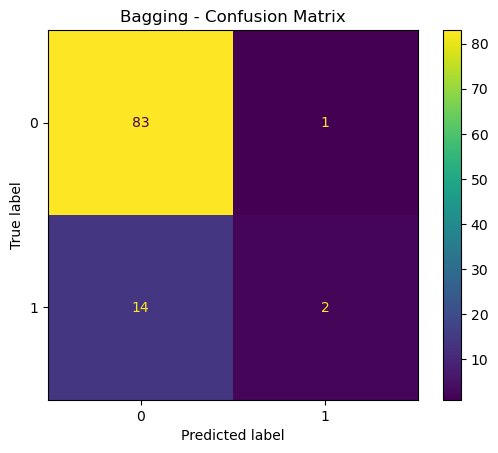

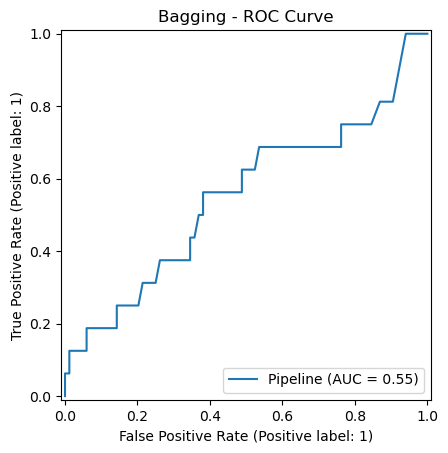

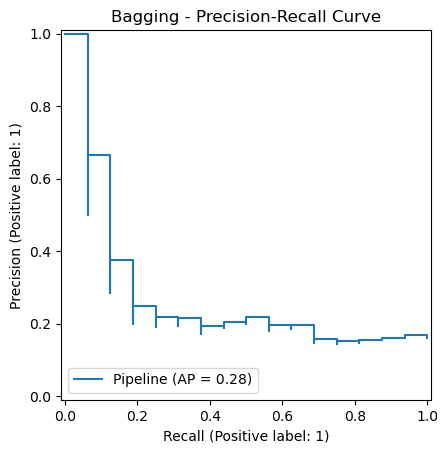


=== RandomForest ===
Training Time: 0.2434 seconds
Accuracy: 0.8500 | Precision: 1.0000 | Recall: 0.0625
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        84
           1       1.00      0.06      0.12        16

    accuracy                           0.85       100
   macro avg       0.92      0.53      0.52       100
weighted avg       0.87      0.85      0.79       100



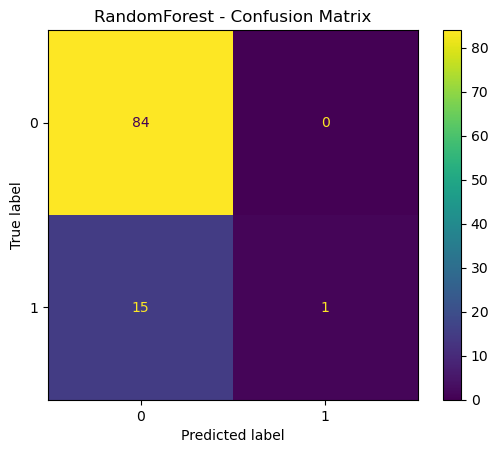

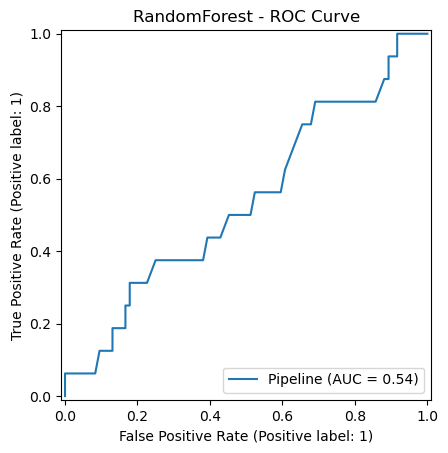

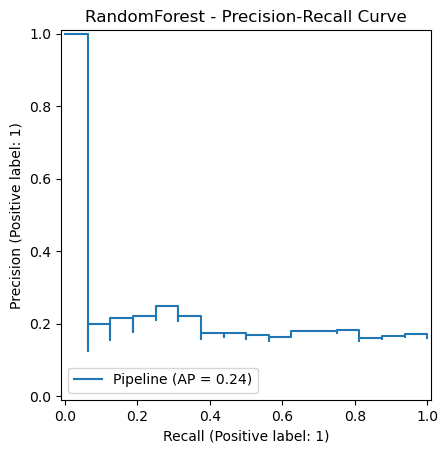


=== AdaBoost ===


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Time: 0.2260 seconds
Accuracy: 0.8000 | Precision: 0.0000 | Recall: 0.0000
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        84
           1       0.00      0.00      0.00        16

    accuracy                           0.80       100
   macro avg       0.42      0.48      0.44       100
weighted avg       0.70      0.80      0.75       100



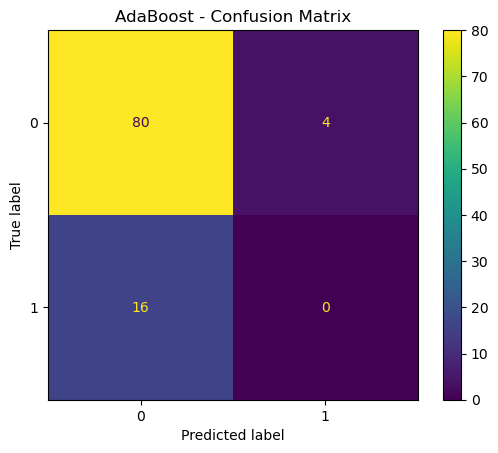

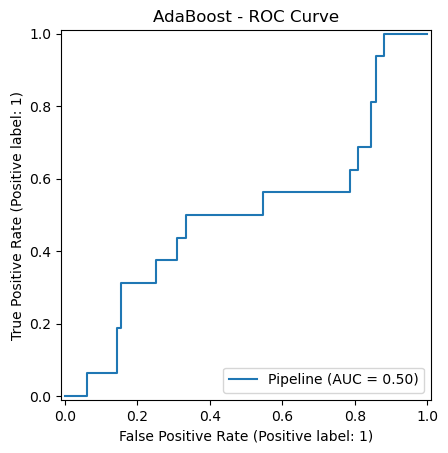

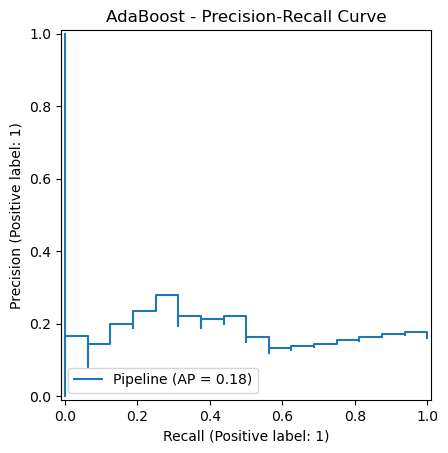

In [ ]:
import time

for name, model in models:
    print(f"\n=== {name} ===")
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # 학습 시간 측정 시작
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    print(f"Training Time: {training_time:.4f} seconds")

    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")
    print(classification_report(y_test, y_pred))